## Módulo 5 - Aula 10 - Projeto Final
Desenvolver o projeto.

## Conteúdo
1. [Importar dados e bibliotecas](#t1.)

2. [Visualização dos dados](#t2.)

3. [Resolvendo o problema](#t3.)

<a id="t1."></a>
# 1. Importar dados e bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing  import scale

In [2]:
df = pd.read_csv("data.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null 

In [4]:
# Reorganizando as posições de cada jogador
DEFENDING = ["CB","LB","LCB","LWB","RB","RCB","RWB"]
MIDFIELD = ["CAM","CDM","CM","LAM","LCM","LDM","LM","RAM","RCM","RDM","RM"]
ATTACKING = ["CF","LF","RF","RS","RW","LW","LS","ST"]
GOALKEEPER = ["GK"]

main = []

for i in df["Position"]:
    if i in DEFENDING:
        main.append("Defensor")
    elif i in MIDFIELD:
        main.append("Meio-Campo")
    elif i in ATTACKING:
        main.append("Atacante")
    elif i in GOALKEEPER:
        main.append("Goleiro")
    else:
        main.append(np.nan)
df["Posição principal"] = main

In [5]:
# Corrigindo os valores de mercado ($$$$$)
def numericValue(arr):
    dummy = []
    for i in range(len(arr)):
        if arr[i][len(arr[i])-1]=="M":
            dummy.append(pd.to_numeric(arr[i][0:len(arr[i])-2])*1000000)
        elif arr[i][len(arr[i])-1]=="K":
            dummy.append(pd.to_numeric(arr[i][0:len(arr[i])-2])*1000)
        else:
            dummy.append(0)
            
    return dummy

df["Value"]=df['Value'].str.replace('€','')
value = numericValue(df["Value"])
df["Value"]=np.array(value)/1000000

In [6]:
# Ajustando o peso dos jogadores
weight = []
for i in df["Weight"]:
    if type(i)==float:
        weight.append(i)
    elif len(i)<6:
        weight.append(pd.to_numeric(i[0:2]))
    else:
        weight.append(pd.to_numeric(i[0:3]))
df["Weight2"]=weight  

In [7]:
# Discretizando as idades dos jogadores
df["Age Cut"]=pd.cut(df["Age"],[0,20,25,30,35,100],labels=["U20","21to25","26to30","31to35","Over35"])

In [8]:
print("Top 10 Clubs of Average Overall...")
pd.DataFrame(df.groupby("Club")["Overall"].mean().sort_values(ascending=False)[:10]).style.background_gradient("Greens")

Top 10 Clubs of Average Overall...


,Overall
Club,
Juventus,82.28
Napoli,80
Inter,79.75
Real Madrid,78.2424
Milan,78.0741
FC Barcelona,78.0303
Paris Saint-Germain,77.4333
Roma,77.4231
Manchester United,77.2424


In [9]:
pd.DataFrame(df.groupby("Club")["Age"].mean().sort_values(ascending=False)[:10]).style.background_gradient("Reds")

,Age
Club,
Paraná,31.6
Cruzeiro,30.6
Atlético Paranaense,30.4
Chapecoense,30.4
Botafogo,30.4
Fluminense,30.2
Ceará Sporting Club,30.2
Sport Club do Recife,30.2
Bahia,30


In [10]:
pd.DataFrame(df.groupby("Club")["Value"].sum().sort_values(ascending=False)[:10]).style.background_gradient("Greens")

,Value
Club,
FC Barcelona,468.279
Real Madrid,454.441
Manchester City,405.285
Inter,363.078
Tottenham Hotspur,338.374
Paris Saint-Germain,326.332
Juventus,312.057
Manchester United,310.224
Atlético Madrid,308.689


In [11]:
df[["Name","Overall","Age"]][:10].set_index("Name").style.background_gradient("Greens")

,Overall,Age
Name,,
L. Messi,94,31
Cristiano Ronaldo,94,33
Neymar Jr,92,26
De Gea,91,27
K. De Bruyne,91,27
E. Hazard,91,27
L. Modrić,91,32
L. Suárez,91,31
Sergio Ramos,91,32


In [12]:
pd.DataFrame(df.groupby("Name")["Weight2"].mean().sort_values(ascending=False)[:10]).style.background_gradient("Greens")

,Weight2
Name,
A. Akinfenwa,243
L. Watkowiak,236
C. Seitz,236
M. Rhead,234
F. Farnolle,229
L. Unnerstall,227
D. Telgenkamp,227
B. Hamid,225
T. Holý,225


<a id="t2."></a>
# 2. Data visualization

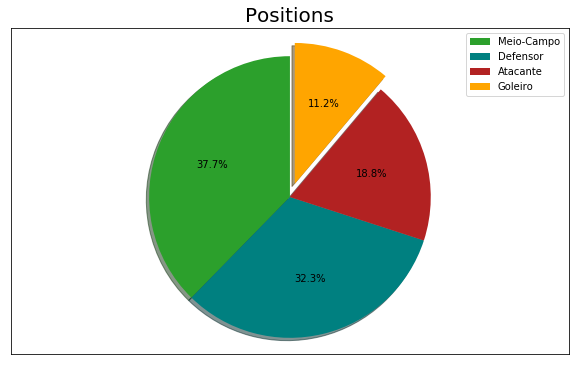

In [13]:
labels  = df["Posição principal"].value_counts().index
sizes   = df["Posição principal"].value_counts().values
explode = (0,0,0,0.1)
plt.figure(figsize=(10,6))
plt.pie(x=sizes,explode=explode,autopct='%1.1f%%',shadow=True, startangle=90, frame=True,colors=["tab:green","teal","firebrick","orange"])
plt.axis('equal')
plt.legend(labels)
plt.title("Positions",fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()

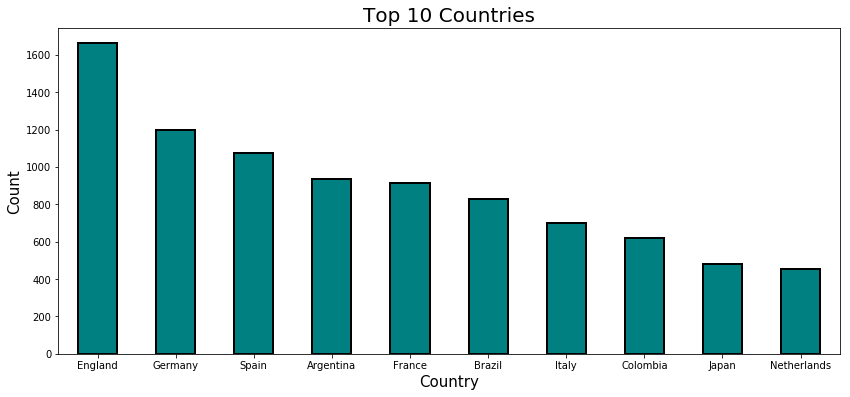

In [14]:
plt.figure(figsize=(14,6))
df["Nationality"].value_counts()[:10].plot(kind="bar",color="teal",lw=2,edgecolor="black")
plt.xticks(rotation=0)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Top 10 Countries",fontsize=20)
plt.show()

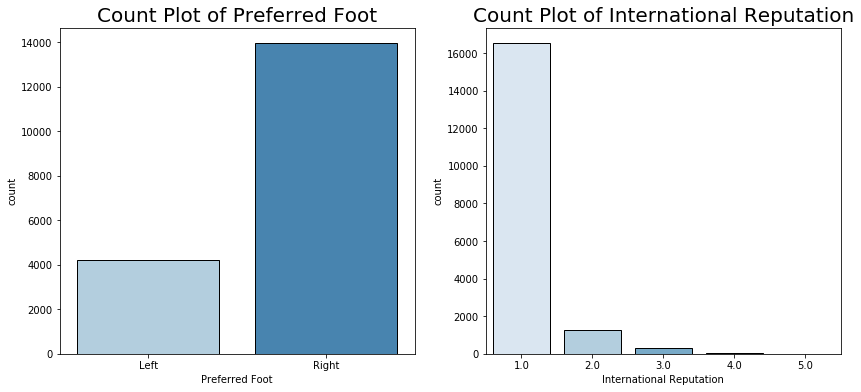

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(data=df , x="Preferred Foot" ,palette="Blues",edgecolor="black")
plt.title("Count Plot of Preferred Foot", fontsize=20)
plt.subplot(1,2,2)
sns.countplot(data=df , x="International Reputation" ,palette="Blues",edgecolor="black")
plt.title("Count Plot of International Reputation", fontsize=20)
plt.show()

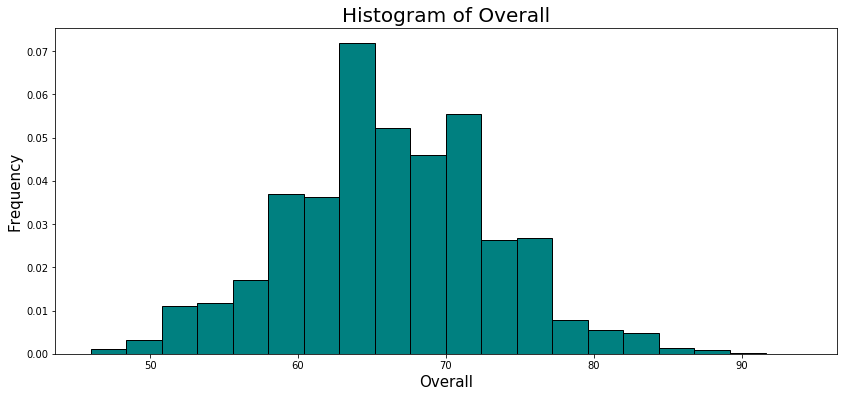

In [16]:
plt.figure(figsize=(14,6))
plt.hist(df["Overall"],bins=20,density=True,color="teal",edgecolor="black")
plt.xlabel("Overall",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title("Histogram of Overall",fontsize=20)
plt.show()

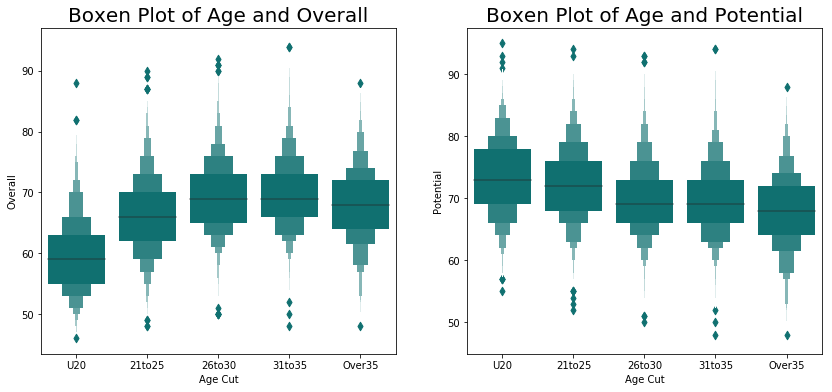

In [17]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxenplot(data=df, x="Age Cut", y="Overall",palette=["teal"])
plt.title("Boxen Plot of Age and Overall",fontsize=20)
plt.subplot(1,2,2)
sns.boxenplot(data=df, x="Age Cut", y="Potential",palette=["teal"])
plt.title("Boxen Plot of Age and Potential",fontsize=20)
plt.show()

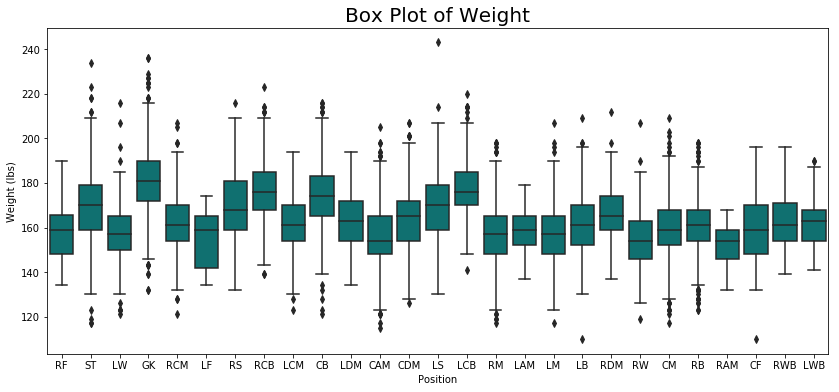

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="Position", y="Weight2",palette=["teal"])
plt.ylabel("Weight (lbs)")
plt.title("Box Plot of Weight",fontsize=20)
plt.show()

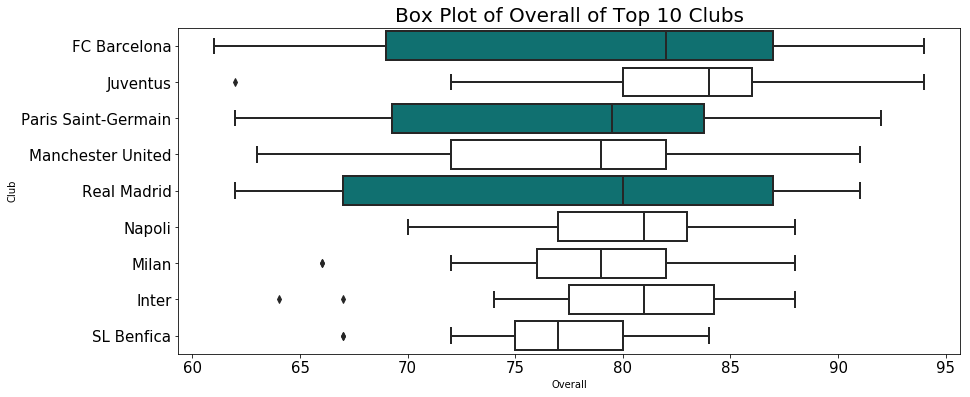

In [19]:
club = df.loc[(df["Club"]=="Juventus")|
      (df["Club"]=="Napoli")|
      (df["Club"]=="Inter")|
      (df["Club"]=="Real Madrid")|
      (df["Club"]=="Milan")|
      (df["Club"]=="FC Barcelona")|
      (df["Club"]=="Paris Saint-Germain")|
      (df["Club"]=="Manchester United")|
      (df["Club"]=="SL Benfica")]

plt.figure(figsize=(14,6))
sns.boxplot(data=club,y="Club",x="Overall",
            palette=["teal","white","teal","white","teal"]+["white"]*4,linewidth=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Box Plot of Overall of Top 10 Clubs",fontsize=20)
plt.show()

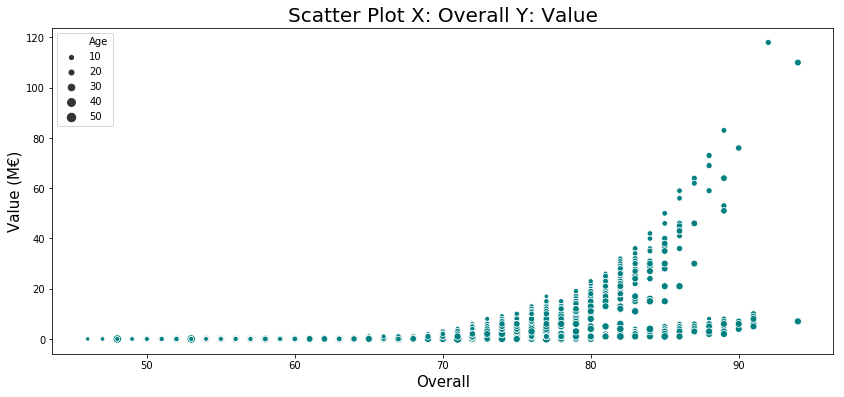

In [20]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, y="Value", x="Overall",size="Age",color="teal")
plt.xlabel("Overall",fontsize=15)
plt.ylabel("Value (M€)",fontsize=15)
plt.title("Scatter Plot X: Overall Y: Value",fontsize=20)
plt.show()

No handles with labels found to put in legend.


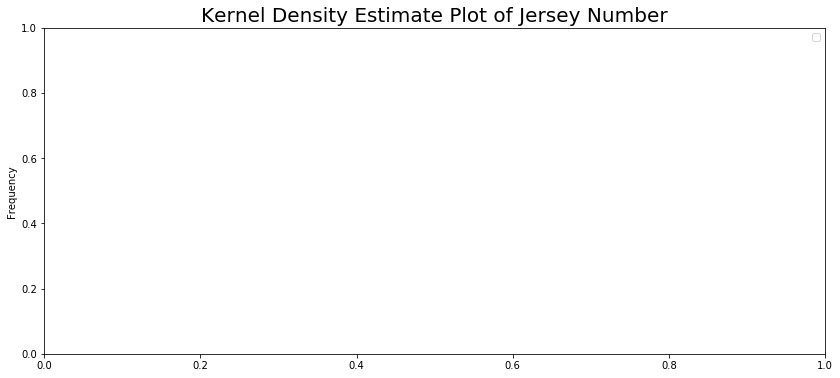

In [21]:
plt.figure(figsize=(14,6))
sns.kdeplot(df.loc[df["Posição principal"]=="Attacking"]["Jersey Number"],label="Attacking",shade=True)
sns.kdeplot(df.loc[df["Posição principal"]=="Midfield"]["Jersey Number"],label="Midfield",shade=True)
sns.kdeplot(df.loc[df["Posição principal"]=="Defending"]["Jersey Number"],label="Defending",shade=True)
sns.kdeplot(df.loc[df["Posição principal"]=="Goalkeeper"]["Jersey Number"],label="Goalkeeper",shade=True)
plt.legend()
plt.title("Kernel Density Estimate Plot of Jersey Number",fontsize=20)
plt.ylabel("Frequency")
plt.show()

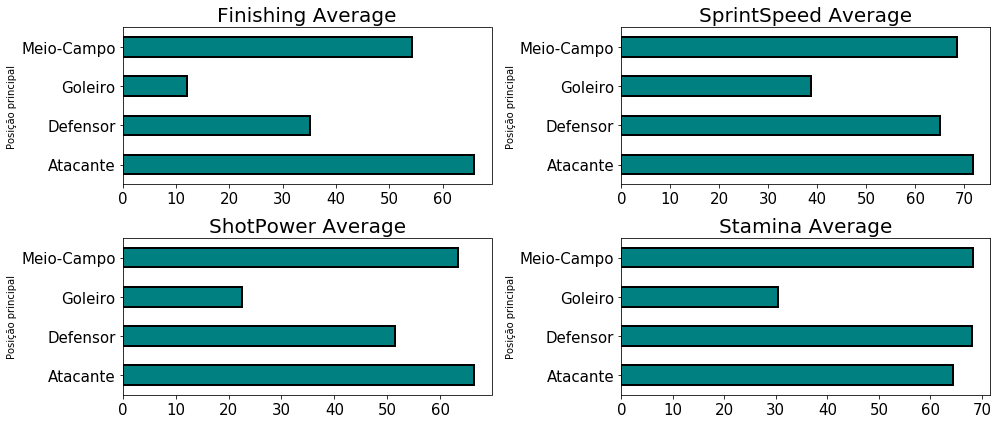

In [22]:
plt.figure(figsize=(14,6))
arr  = ["Finishing","SprintSpeed","ShotPower","Stamina"]
for i in range(1,5):
    plt.subplot(2,2,i)
    df.groupby(["Posição principal"])[arr[i-1]].mean().sort_index().plot(kind="barh",color="teal",edgecolor="black",lw=2)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title("{} Average".format(arr[i-1]),fontsize=20)
plt.tight_layout()
plt.show()

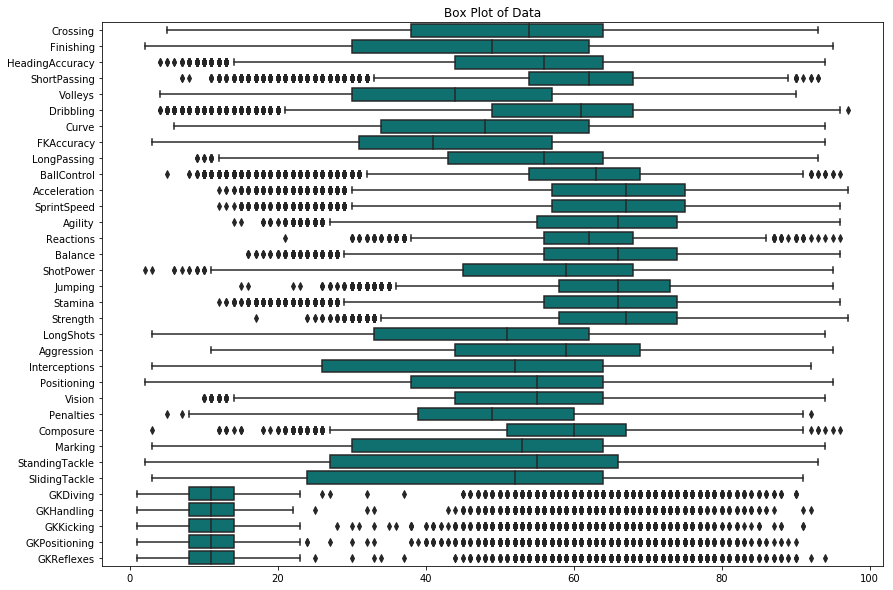

In [23]:
plt.figure(figsize=(14,10))
sns.boxplot(data=df.iloc[:,53:88], orient="h", palette=["teal"])
plt.title("Box Plot of Data")
plt.show()

In [24]:
i_aux = np.concatenate([(2,), np.arange(start=53, stop=89, step=1)])
skills = df.iloc[:,i_aux]
skills.drop("Release Clause",axis=1,inplace=True)
skills["Name"]=df["Name"]
skills = skills.set_index("Name")
skills.dropna(inplace=True)

c:\program files\python35\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [25]:
skills.head()

,Age,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Posição principal
Name,,,,,,,,,,,,,,,,,,,,,
L. Messi,31,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,Atacante
Cristiano Ronaldo,33,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,Atacante
Neymar Jr,26,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,Atacante
De Gea,27,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,Goleiro
K. De Bruyne,27,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,Meio-Campo


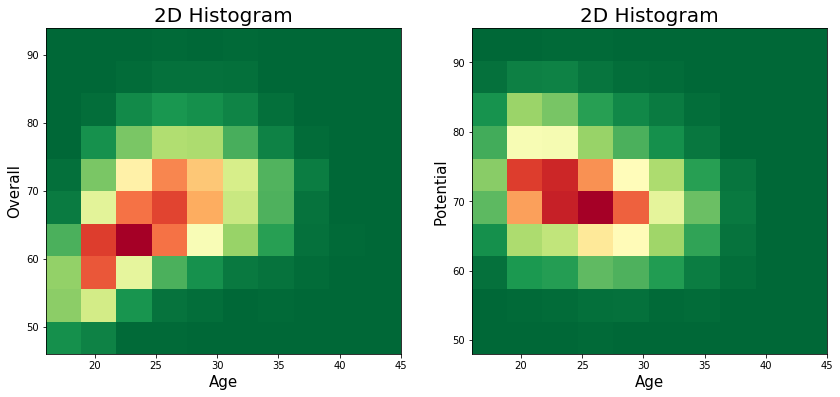

In [26]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.hist2d(x=df["Age"],y=df["Overall"],cmap="RdYlGn_r",bins=10)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Overall",fontsize=15)
plt.title("2D Histogram",fontsize=20)
plt.subplot(1,2,2)
plt.hist2d(x=df["Age"],y=df["Potential"],cmap="RdYlGn_r",bins=10)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Potential",fontsize=15)
plt.title("2D Histogram",fontsize=20)
plt.show()

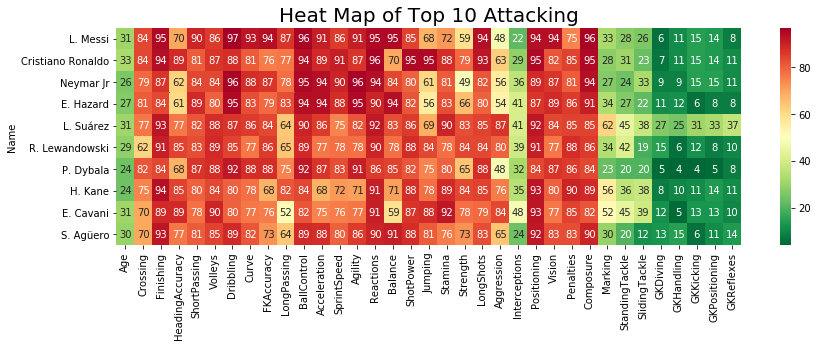

In [27]:
plt.figure(figsize=(14,4))
sns.heatmap(skills.loc[skills["Posição principal"]=="Atacante"].drop("Posição principal",axis=1)[:10],cmap="RdYlGn_r",annot=True)
plt.title("Heat Map of Top 10 Attacking",fontsize=20)
plt.show()

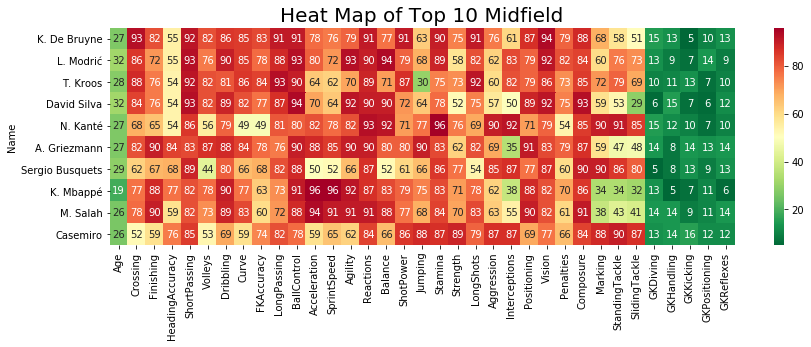

In [28]:
plt.figure(figsize=(14,4))
sns.heatmap(skills.loc[skills["Posição principal"]=="Meio-Campo"].drop("Posição principal",axis=1)[:10],cmap="RdYlGn_r",annot=True)
plt.title("Heat Map of Top 10 Midfield",fontsize=20)
plt.show()

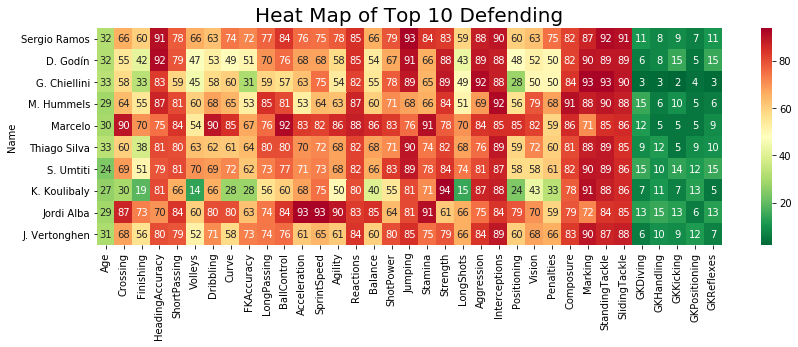

In [29]:
plt.figure(figsize=(14,4))
sns.heatmap(skills.loc[skills["Posição principal"]=="Defensor"].drop("Posição principal",axis=1)[:10],cmap="RdYlGn_r",annot=True)
plt.title("Heat Map of Top 10 Defending",fontsize=20)
plt.show()

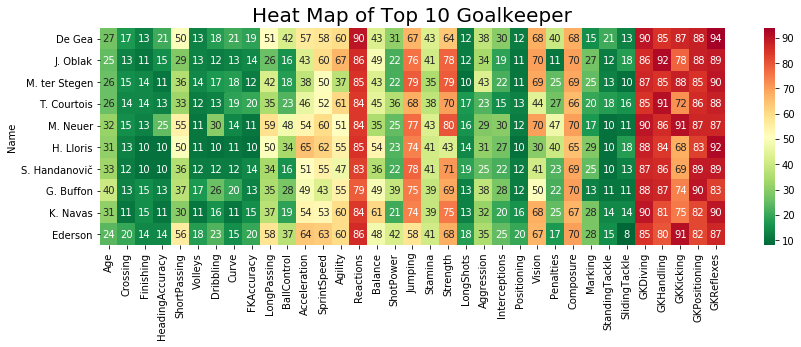

In [30]:
plt.figure(figsize=(14,4))
sns.heatmap(skills.loc[skills["Posição principal"]=="Goleiro"].drop("Posição principal",axis=1)[:10],cmap="RdYlGn_r",annot=True)
plt.title("Heat Map of Top 10 Goalkeeper",fontsize=20)
plt.show()

<a id="t3."></a>
# 3. Resolvendo o problema